<a href="https://colab.research.google.com/github/techieaditya/eip-4/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


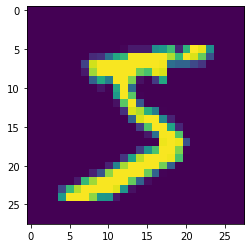

In [178]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [181]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [183]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,BatchNormalization
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(Convolution2D(32, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))
model.add(Convolution2D(64, (3,3), activation="relu"))
model.add(Convolution2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [185]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 4, 4, 64)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [187]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.1854 - acc: 0.9430
Epoch 2/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.0665 - acc: 0.9801
Epoch 3/10
60000/60000 [==============================] - 29s 486us/step - loss: 0.0520 - acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.0422 - acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.0378 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.0308 - acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.0276 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0251 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0219 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 29s 479us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [195]:
print(score)

[0.02058969210838868, 0.9936]


In [0]:
y_pred = model.predict(X_test)

In [191]:
print(y_pred[:9])
print(y_test[:9])

[[1.3033281e-09 2.8275702e-08 2.7589221e-07 3.1242401e-08 7.5132442e-07
  3.6036187e-09 1.0831629e-09 9.9999881e-01 5.2878629e-10 1.5802264e-07]
 [3.2285161e-07 2.9262941e-09 9.9999952e-01 4.2136485e-08 8.5764809e-09
  6.6510742e-12 3.9065881e-08 1.7281568e-08 1.4739676e-08 7.6480093e-09]
 [2.5598771e-08 9.9999714e-01 5.9921280e-07 2.3754193e-08 1.6212422e-07
  1.2767756e-08 1.5204040e-07 1.7977454e-06 1.1073200e-08 5.7875184e-08]
 [9.9999714e-01 4.5663979e-09 5.8741083e-08 4.1985004e-08 5.5883507e-09
  7.3613343e-08 2.2326942e-06 5.3781946e-08 6.2289935e-08 2.4449463e-07]
 [3.4514116e-08 5.6500727e-07 2.5691701e-08 3.3750609e-09 9.9999499e-01
  2.0396983e-07 1.5931276e-07 3.9139842e-08 3.1379461e-08 3.9403772e-06]
 [1.8743618e-09 9.9999976e-01 4.9166250e-08 1.0724638e-09 3.9158845e-08
  5.8582289e-10 1.1333142e-08 2.0343928e-07 7.8523915e-10 7.2631785e-09]
 [1.4571064e-09 4.8243561e-07 4.5400008e-09 5.5649957e-10 9.9999619e-01
  1.7829618e-07 1.9807447e-07 6.8552566e-07 2.1048804e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [193]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored